# Assignment 4. Deep Learning

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For questions 2-4 refer to @alregamo on Telegram.*

### Description  
This homework consists of four questions, each aimed at one category in the world of Deep Learning.   
1. Getting familiarized with sentiment analysis (A subject also covered in the course project).
   
2. Multi-layer perceptron (MLP). 
   
3. Convolutional Neural Networks (CNN).
   
4. Variational Autoencoders (VAE).

### Information  
Complete the information box below.

In [10]:
full_name = 'Ali Nikkhah'
student_id = '99102445'

### Note
The questions are not necessarily in order of difficulty. You are obligated to answer **3 out of 4** questions. The fourth question is optional and is considered as bonus.

## 3 Convolutational Neural Networks (CNN)

In this problem, you are going to compare the results of a simple CNN with a pre-trained deep learning model such as VGG16 for a classification task.

For this purpose, we are going to use a publicly available dataset, named CIFAR10. The CIFAR-10 dataset is a popular benchmark in the field of machine learning for image recognition tasks. Here are the key points about this dataset:

1. **Content**: The CIFAR-10 dataset consists of 60,000 32x32 color images. These images are divided into 10 different classes, representing different objects. The classes are airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

2. **Structure**: The dataset is split into two parts: 50,000 images for training and 10,000 images for testing. Each class in the dataset is represented equally, with 6,000 images per class.

3. **Purpose**: CIFAR-10 is widely used for training and evaluating machine learning and image processing systems. It's a benchmark dataset for developing and testing machine learning algorithms, especially in the field of computer vision.

4. **Challenge**: The relatively low resolution of the images (32x32 pixels) makes it a challenging dataset for image classification tasks. The small size of the images means that the details that distinguish between the classes can be quite subtle.

### 3.1 Data Loading

Load the dataset with <code>torchvision.datasets</code> or <code>tensorflow.keras.datasets</code> and split the data into training and test sets.

In [11]:
import torch
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split

# Define transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the dataset (change 'MNIST' to your desired dataset)
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split the dataset into training and test sets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


### 3.2 CNN Model

Build a simple 3-layer CNN model, which takes CIFAR10 images as input and classify their labels. Feel free to use <code>BatchNorm</code> or <code>Pooling</code> layers between your <code>Conv</code> layers. Use 2 layers of fully connected <code>Linear</code> or <code>Dense</code> layers for classificaton.

After building your model, make a summary of your architecture using <code>model.summary()</code> in Keras or <code> torchsummary</code> library for pytorch models.

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 2, 2, 128)        

### 3.3 Train your Model

Train your model for 20 epochs by using Adam optimizer for the training. Plot the accuracy curves for your training and test data during the training phase. Also plot the loss curves as well. 

You can use interactive tools such as <code>tensorboard</code> for these visualizations.

Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5572 - accuracy: 0.4272 - val_loss: 1.2657 - val_accuracy: 0.5503
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1723 - accuracy: 0.5829 - val_loss: 1.1217 - val_accuracy: 0.6076
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0044 - accuracy: 0.6462 - val_loss: 0.9858 - val_accuracy: 0.6521
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8973 - accuracy: 0.6870 - val_loss: 0.8981 - val_accuracy: 0.6892
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8238 - accuracy: 0.7094 - val_loss: 0.9653 - val_accuracy: 0.6680
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7523 - accuracy: 0.7367 - val_loss: 0.9152 - val_accuracy: 0.6979
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7069 - accuracy: 0.7519 - val_loss: 0.8607 - val_ac

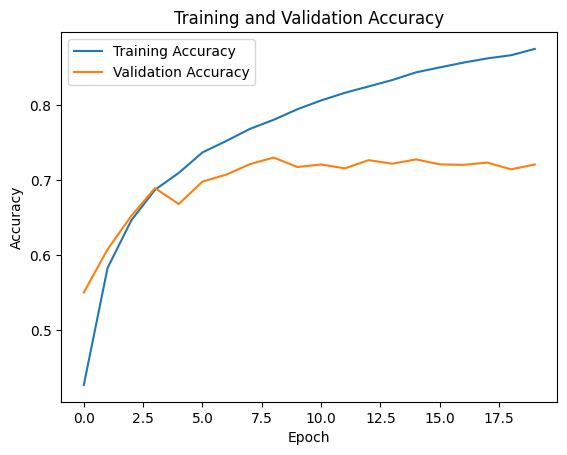

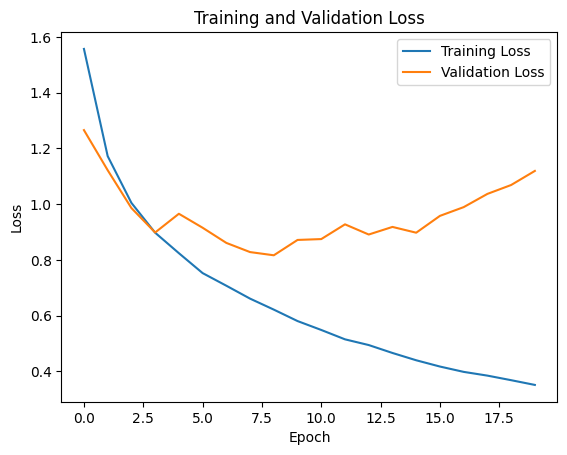

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt



# Train the model for 20 epochs
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Now we train a bigger neural net and check results

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the CNN model with padding in Conv2D layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 4, 4, 128)        

Epoch 1/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5836 - accuracy: 0.4107 - val_loss: 1.1649 - val_accuracy: 0.5777
Epoch 2/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1000 - accuracy: 0.6106 - val_loss: 0.9742 - val_accuracy: 0.6568
Epoch 3/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8978 - accuracy: 0.6888 - val_loss: 0.9309 - val_accuracy: 0.6742
Epoch 4/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7711 - accuracy: 0.7315 - val_loss: 0.8166 - val_accuracy: 0.7166
Epoch 5/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6790 - accuracy: 0.7646 - val_loss: 0.8007 - val_accuracy: 0.7247
Epoch 6/20
1563/1563 [==============================] - 23s 14ms/step - loss: 0.5970 - accuracy: 0.7931 - val_loss: 0.7966 - val_accuracy: 0.7325
Epoch 7/20
1563/1563 [==============================] - 23s 14ms/step - loss: 0.5337 - accuracy: 0.8153 - val_loss: 0.8024 -

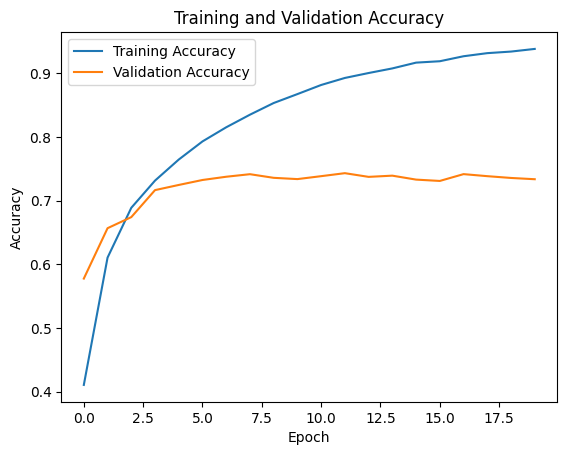

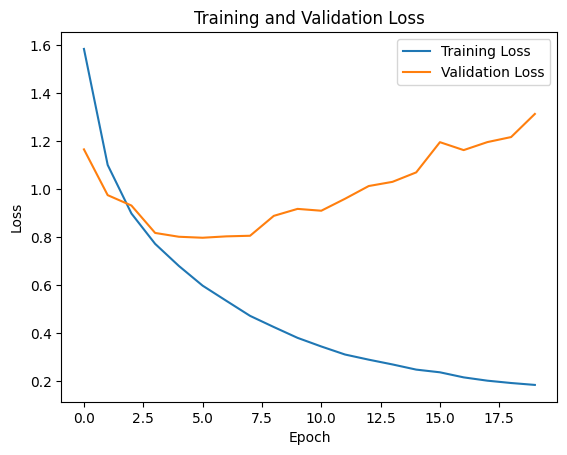

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt



# Train the model for 20 epochs
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1765 - accuracy: 0.9406 - val_loss: 1.3841 - val_accuracy: 0.7329
Epoch 2/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.1746 - accuracy: 0.9426 - val_loss: 1.4818 - val_accuracy: 0.7181
Epoch 3/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1640 - accuracy: 0.9470 - val_loss: 1.3328 - val_accuracy: 0.7259
Epoch 4/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1625 - accuracy: 0.9465 - val_loss: 1.3635 - val_accuracy: 0.7302
Epoch 5/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1533 - accuracy: 0.9499 - val_loss: 1.3833 - val_accuracy: 0.7348
Epoch 6/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1571 - accuracy: 0.9486 - val_loss: 1.3939 - val_accuracy: 0.7306
Epoch 7/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1430 - accuracy: 0.9536 - val_loss: 1.5038 -

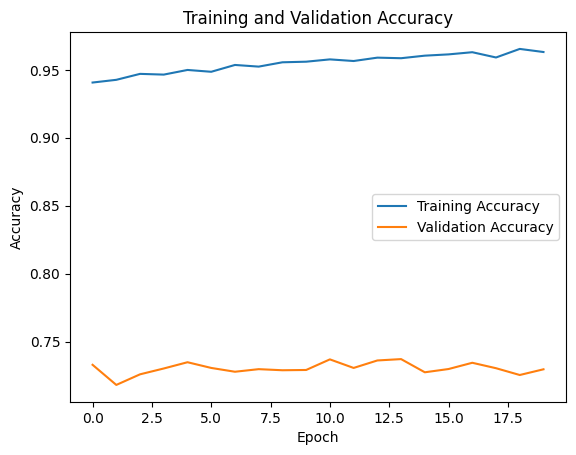

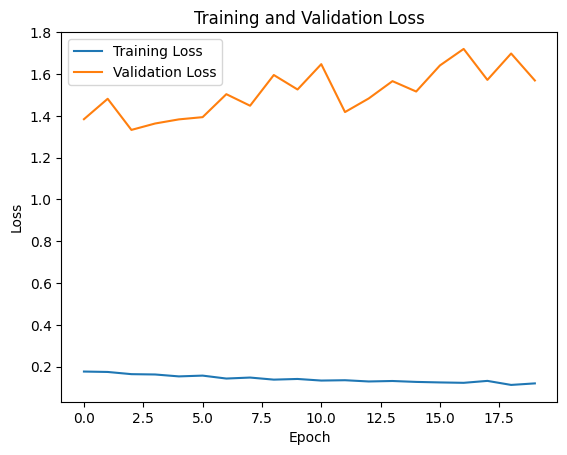

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt



# Train the model for 20 epochs
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 3.4 Evaluate your Model

Now that you have trained your model, do the followings:

* plot your model's confusion matrix on the test set.
* report its final accuracy on your test set.
* show some images from the test set with their corresponding true label and your predictions.

Sample images from the training set:


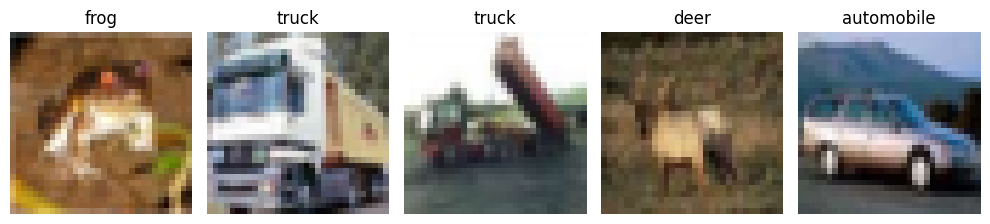


Sample images from the test set:


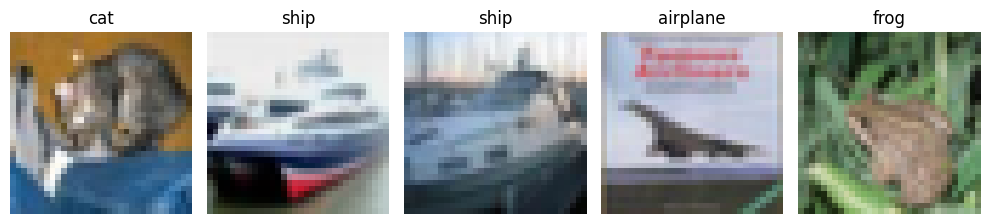

In [17]:
# Define class names for CIFAR10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display images with their labels
def display_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images from the training set
print("Sample images from the training set:")
display_images(x_train, y_train)

# Display sample images from the test set
print("\nSample images from the test set:")
display_images(x_test, y_test)

313/313 [==============================] - 2s 5ms/step


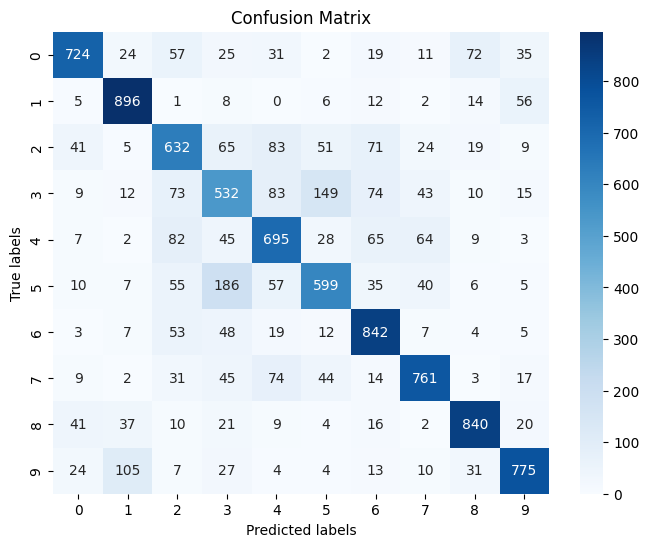

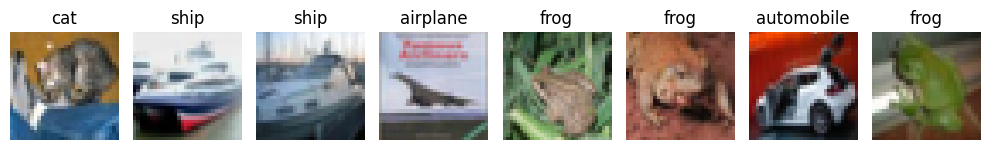

Final Accuracy on Test Set: 0.7296


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# Define class names for CIFAR10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_images=8
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i])
    plt.title(class_names[y_test[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()
# Print final accuracy
print(f"Final Accuracy on Test Set: {accuracy:.4f}")


In [21]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 [==============================] - 2s 5ms/step - loss: 1.5694 - accuracy: 0.7296
Test Loss: 1.5694
Test Accuracy: 0.7296


### VGG16 Model and Transfer Learning

VGG16 is a popular convolutional neural network (CNN) architecture that was introduced by Karen Simonyan and Andrew Zisserman from the University of Oxford in a 2014 paper titled "Very Deep Convolutional Networks for Large-Scale Image Recognition." Here are the key points about the VGG16 model:

1. **Architecture**: VGG16 is named for its 16 layers that have weights. The architecture is characterized by its simplicity, using only 3x3 convolutional layers stacked on top of each other in increasing depth. Reducing volume size is handled by max pooling. The final architecture includes several fully connected layers.

2. **Uniform Design**: One of the defining aspects of VGG16 is its uniformity. All hidden layers use the same 3x3 convolutional filters with a stride of 1 and the same max pooling filters of 2x2 with a stride of 2. This consistency makes the architecture easy to scale and adapt.

3. **Depth**: The depth of the network (16 layers) was a significant feature at the time of its introduction. The increased depth helps the network to learn more complex patterns in the data.

4. **Performance**: In the ImageNet competition, which is a benchmark in image classification, VGG16 significantly improved upon the architectures that had been used previously, demonstrating the power of deeper neural networks.

5. **Applications**: VGG16, and its larger counterpart VGG19, are widely used in image processing. They are used both as standalone models for image classification tasks and as feature extraction parts of larger models in more complex tasks.

6. **Transfer Learning**: Due to its simplicity and high performance on benchmark datasets, VGG16 is often used as a pre-trained model for transfer learning, especially in tasks where training data might be limited. In this context, VGG16 trained on a large dataset like ImageNet is adapted to a new task with a relatively small amount of new data.

7. **Resource Intensity**: One downside of VGG16 is that it is resource-intensive, both in terms of the number of parameters and computation. This can make it less practical for deployment in resource-constrained environments.

VGG16 represents a key milestone in the development of deep learning architectures for image recognition, and it remains a popular choice for both academic and practical applications in the field of computer vision.

Here we want to use a VGG16 pre-trained model (trained on the ImageNet dataset) and use a transfer learning approach to fine-tune the model for our dataset. 

Certainly! Fine-tuning a pre-trained VGG16 model on the CIFAR-10 dataset is a common practice in deep learning, especially to demonstrate the power of transfer learning. Here are the steps and explanations you can provide to your students:

#### Understanding Transfer Learning and Fine-Tuning
- **Transfer Learning**: It's a technique where a model developed for one task is reused as the starting point for a model on a second task. It's especially popular in deep learning where large models take a lot of resources to train.
- **Fine-Tuning**: Involves tweaking the pre-trained model slightly to adapt it to a new, but similar task. In this case, fine-tuning a VGG16 model pre-trained on ImageNet to work on CIFAR-10.


### 3.5 Building your Model

Importing the VGG16 Model from TensorFlow or PyTorch models and load the model with pre-trained weights.

In [22]:
import os
import ssl
import urllib.request
from tqdm import tqdm

# Create an SSL context without certificate verification
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Define the URL and file path
url = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
file_path = os.path.join(os.path.expanduser('~'), '.keras', 'models', 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

# Download the file with the custom SSL context and tqdm for progress
with urllib.request.urlopen(url, context=ssl_context) as response, open(file_path, 'wb') as out_file:
    file_size = int(response.headers['content-length'])
    with tqdm(total=file_size, unit='B', unit_scale=True, desc='Downloading', leave=True) as pbar:
        while True:
            buffer = response.read(8192)
            if not buffer:
                break
            out_file.write(buffer)
            pbar.update(len(buffer))


Downloading: 100%|█████████████████████████| 58.9M/58.9M [00:32<00:00, 1.80MB/s]


CIFAR-10 images are 32x32 pixels, much smaller than the ImageNet images VGG16 was trained on (224x224 pixels). Decide on a strategy to handle this (e.g., resize CIFAR-10 images or modify the VGG16 input layer). Also, CIFAR-10 images need to be preprocessed to be compatible with VGG16. This includes normalizing pixel values in the same way as was done for the ImageNet images.

For this preprocessing steps, you can use <code>torchvision.transforms</code> in PyTorch or <code>tensorflow.keras.preprocessing.image.ImageDataGenerator</code> in TensorFlow.

In [25]:
import torchvision.transforms as transforms

# Define transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to VGG16 input size
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])


Besides, you need to replace the output layer (or fully connected layers) of VGG16 to match the number of classes in CIFAR-10 (10 classes). This is because the original VGG16 model output is designed for 1,000 classes (ImageNet).

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model without top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.summary()
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new fully connected output layer for 10 classes
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x) 

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

"Freeze" the weights of the earlier layers of the model. This means the weights in these layers won’t be updated during training. Usually, the earlier layers of a CNN capture generic features like edges and textures that are also useful for new tasks.

Only the weights of the newly added output layer (and possibly the previous fully connected layers) of the model is need to be trained.

### 3.6 Training your Model
Train the model on the CIFAR-10 training data for 20 epochs by using Adam optimizer. Remember you only need to update the weights of the unfrozen layers to adapt the model to the CIFAR-10 dataset.

Plot the accuracy curves for your training and test data during the training phase. Also plot the loss curves as well. 

You can use interactive tools such as <code>tensorboard</code> for these visualizations.

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/20
1563/1563 [==============================] - 118s 76ms/step - loss: 2.1386 - accuracy: 0.5315 - val_loss: 1.2187 - val_accuracy: 0.5858
Epoch 2/20
1563/1563 [==============================] - 119s 76ms/step - loss: 1.1049 - accuracy: 0.6232 - val_loss: 1.2522 - val_accuracy: 0.5906
Epoch 3/20
1563/1563 [==============================] - 120s 76ms/step - loss: 1.0451 - accuracy: 0.6466 - val_loss: 1.2801 - val_accuracy: 0.5940
Epoch 4/20
1563/1563 [==============================] - 120s 77ms/step - loss: 0.9796 - accuracy: 0.6675 - val_loss: 1.3269 - val_accuracy: 0.5947
Epoch 5/20
1563/1563 [==============================] - 120s 77ms/step - loss: 0.9089 - accuracy: 0.6937 - val_loss: 1.3867 - val_accuracy: 0.5960
Epoch 6/20
1563/1563 [==============================] - 120s 77ms/step - loss: 0.8282 - accuracy: 0.7204 - val_loss: 1.5469 - val_accuracy: 0.5959
Epoch 7/20
1563/1563 [==============================] - 120s 77ms/step - loss: 0.7590 - accuracy: 0.7433 - val_loss: 1

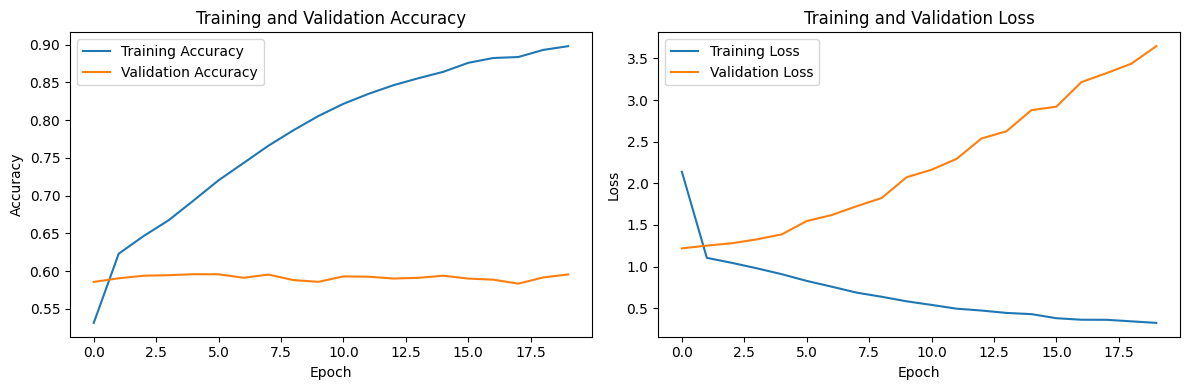

In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tqdm.keras import TqdmCallback  # Import TqdmCallback from tqdm.keras

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()




# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs with tqdm callback for progress visualization
history = model.fit(
    x_train, y_train, epochs=20, validation_data=(x_test, y_test), 
    callbacks=[TqdmCallback(verbose=1)]  # Use TqdmCallback for progress visualization
)

# Plot accuracy and loss curves during training
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### 3.7 Evaluate your Model

Now that you have trained your model, do the followings:

* plot your model's confusion matrix on the test set.
* report its final accuracy on your test set.
* show some images from the test set with their corresponding true label and your predictions.

313/313 [==============================] - 17s 53ms/step


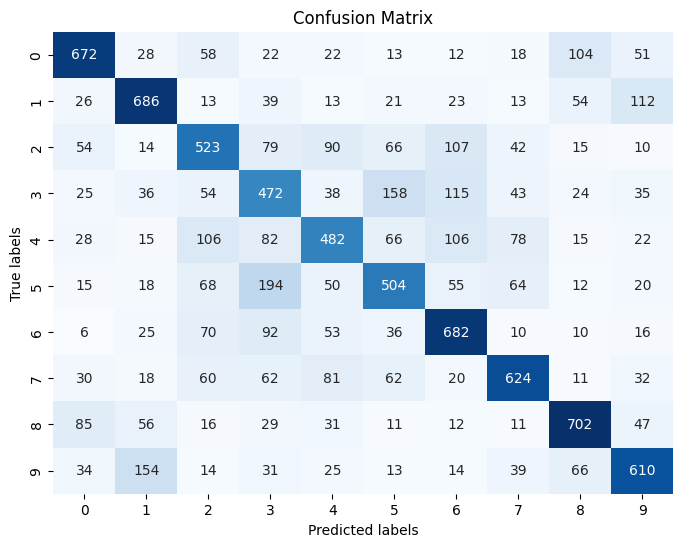

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Generate predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Final Accuracy on Test Set: {accuracy:.4f}")


Final Accuracy on Test Set: 0.5957


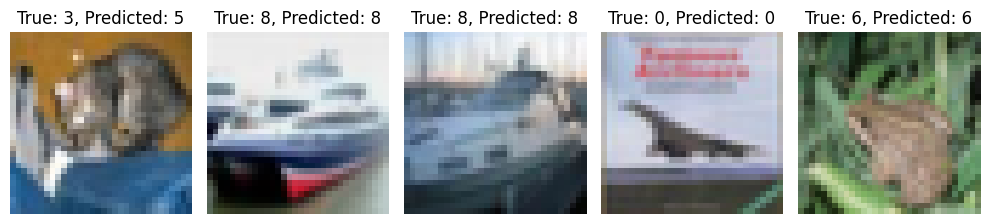

In [32]:
# Display some sample images with true and predicted labels
num_samples = 5
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"True: {y_true[i]}, Predicted: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### 3.8 Discussing and Comparison
- Discuss the advantages of transfer learning in terms of training time and accuracy scores.
- Also, cover potential drawbacks, like overfitting if the new dataset is too small or too different from the original dataset the model was trained on.


#### Advantages of Transfer Learning:

1. **Reduced Training Time:** Transfer learning allows leveraging pre-trained models' knowledge, enabling faster convergence during training. Instead of starting from scratch, the model starts with features already learned from a larger dataset.

2. **Improved Generalization and Accuracy:** Pre-trained models are trained on vast and diverse datasets, capturing general features like shapes, textures, edges, etc. These learned features often generalize well to new datasets, leading to better accuracy, especially when the new dataset shares similarities with the original dataset.

3. **Lower Data Requirements:** With transfer learning, you may achieve satisfactory performance with smaller training datasets. This is especially beneficial when collecting a large dataset is impractical or expensive.

However, transfer learning has potential drawbacks that need consideration:

#### Drawbacks of Transfer Learning:

1. **Overfitting on Smaller Datasets:** If the new dataset is small or significantly different from the original dataset, the model might overfit. The pre-trained features may not generalize well to the new data, leading to poor performance.

2. **Limited Adaptability:** Pre-trained models might capture high-level features useful for the original task but may not be optimal for the specific nuances of the new task. Adapting these features to the new dataset can be limited by the pre-existing learned representations.

3. **Domain Shift:** If there's a considerable domain shift between the original and new datasets (e.g., different image qualities, styles, or subject matter), the pre-trained features might not be suitable, requiring additional fine-tuning or retraining.

In summary, while transfer learning provides a significant head start in training deep learning models, its effectiveness heavily depends on the similarity between the original and new datasets. Careful consideration of dataset size, similarity, and adaptation strategies is crucial to maximize the benefits and mitigate the drawbacks of transfer learning.